In [29]:
#importing libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data preprocessing

In [16]:
# Training data processing

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    
    'training_set', target_size=(64,64), batch_size=32, class_mode='categorical')

Found 860 images belonging to 18 classes.


In [17]:
# Test data processing

test_datagen = ImageDataGenerator(
    rescale=1./255)

test_set = test_datagen.flow_from_directory('test_set', target_size=(64,64), batch_size=32, class_mode='categorical')

Found 217 images belonging to 18 classes.


# Building model

In [18]:
cnn = tf.keras.models.Sequential()

In [19]:
# Building convo layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters =64 , kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters =96 , kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=18,activation='softmax'))

C:\Users\AIPA\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3456)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         442,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 519,602 (1.98 MB)

 Trainable params: 519,602 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=40)

Epoch 1/40


C:\Users\AIPA\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.1117 - loss: 2.8539 - val_accuracy: 0.1889 - val_loss: 2.4132
Epoch 2/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.1694 - loss: 2.4815 - val_accuracy: 0.1797 - val_loss: 2.3648
Epoch 3/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2008 - loss: 2.3273 - val_accuracy: 0.2120 - val_loss: 2.1754
Epoch 4/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.2036 - loss: 2.2656 - val_accuracy: 0.3180 - val_loss: 2.0266
Epoch 5/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.2580 - loss: 2.1339 - val_accuracy: 0.3548 - val_loss: 2.0519
Epoch 6/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.3213 - loss: 2.0080 - val_accuracy: 0.4009 - val_loss: 1.7831
Epoch 7/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.3367 - loss: 1.8154 - val_accuracy: 0.1751 - val_loss: 2.2681
Epoch 8/40
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.3781 - loss: 1.7177 - val_accuracy: 0.2673 - val_loss:

In [23]:
from tensorflow.keras.preprocessing.image import load_img
import PIL

In [24]:
import scipy
print(scipy.__version__)

1.15.3


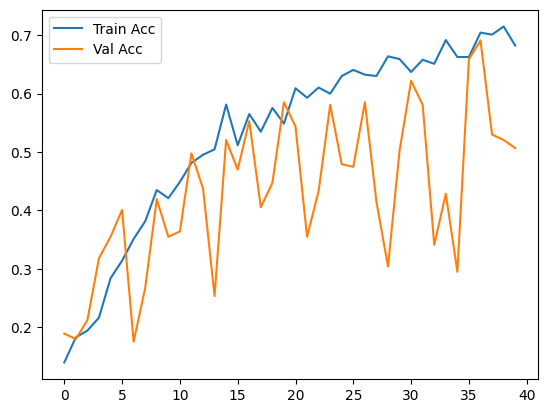

In [25]:
# Accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

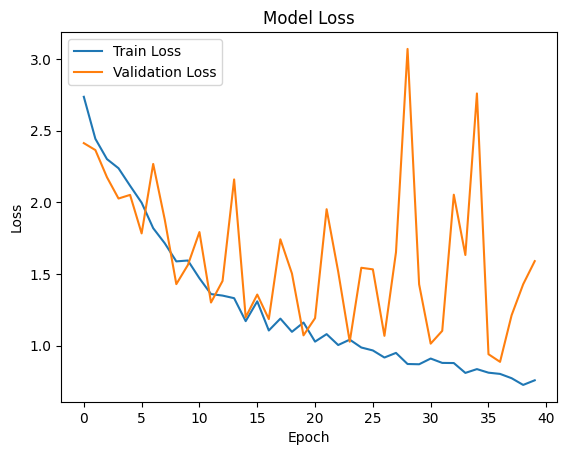

In [26]:
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/stepWARNING:tensorflow:5 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000169A9DB52D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


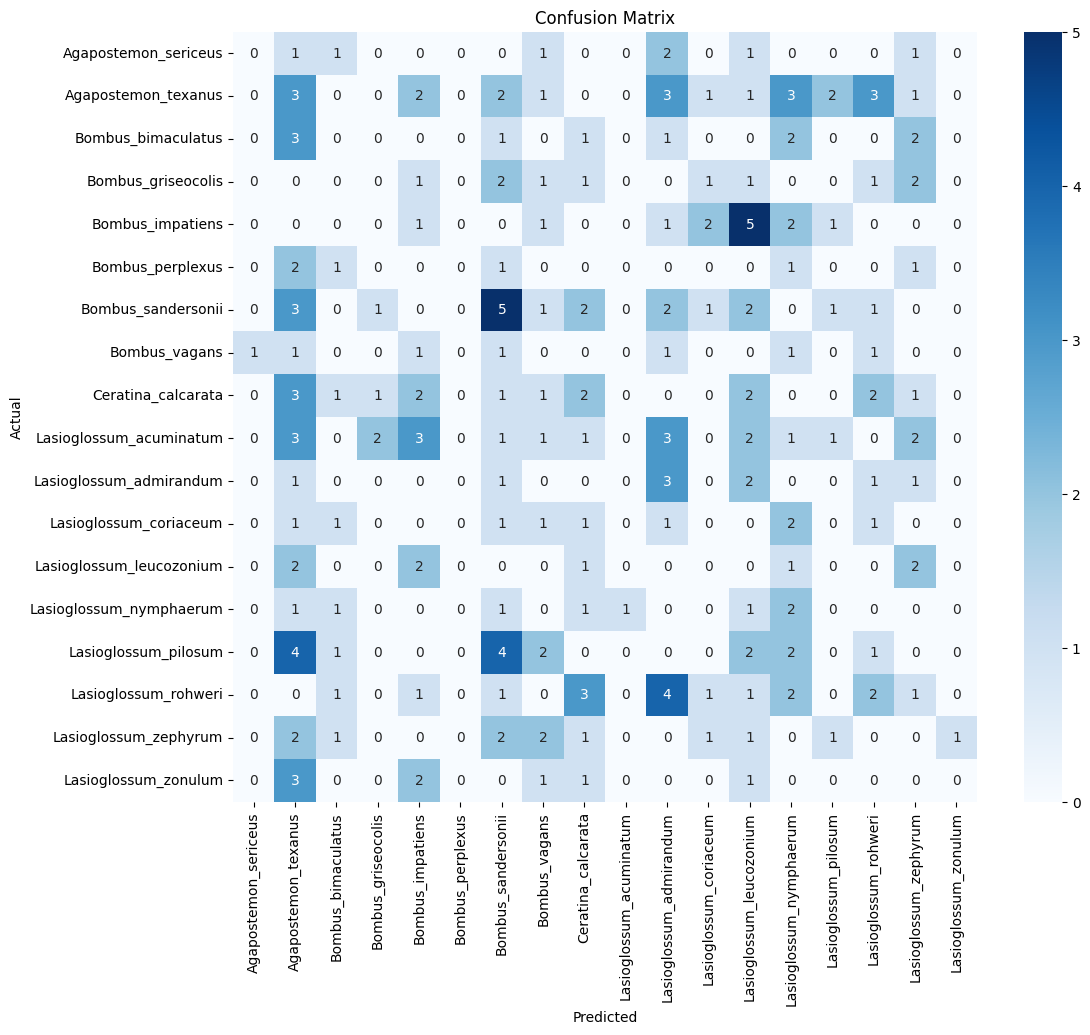

                          precision    recall  f1-score   support

    Agapostemon_sericeus       0.00      0.00      0.00         7
     Agapostemon_texanus       0.09      0.14      0.11        22
      Bombus_bimaculatus       0.00      0.00      0.00        10
      Bombus_griseocolis       0.00      0.00      0.00        10
        Bombus_impatiens       0.07      0.08      0.07        13
        Bombus_perplexus       0.00      0.00      0.00         6
      Bombus_sandersonii       0.21      0.26      0.23        19
           Bombus_vagans       0.00      0.00      0.00         7
      Ceratina_calcarata       0.13      0.12      0.13        16
 Lasioglossum_acuminatum       0.00      0.00      0.00        20
 Lasioglossum_admirandum       0.14      0.33      0.20         9
  Lasioglossum_coriaceum       0.00      0.00      0.00         9
Lasioglossum_leucozonium       0.00      0.00      0.00         8
 Lasioglossum_nymphaerum       0.11      0.25      0.15         8
    Lasio

C:\Users\AIPA\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AIPA\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AIPA\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Predict test set
Y_pred = cnn.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_set.classes
class_labels = list(test_set.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Optional: classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

In [28]:
from tensorflow.keras.preprocessing import image

img = image.load_img('8493 Ceratina calcarata f right 4x.jpg', target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = cnn.predict(img_array)
predicted_class = np.argmax(prediction[0])
class_labels = list(training_set.class_indices.keys())

print("Predicted class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class: Ceratina_calcarata
